IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from plotnine import *

PROCESAMIENTO DE DATOS

In [2]:
dataRN = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = dataRN['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
dataRN = pd.concat( [ dataRN,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
dataRN['Sueldo'] = dataRN['Sueldo'].str.extract('(\d+)', 
                                                    expand=False).astype(float)
dataRN['Sueldo'] = dataRN['Sueldo']*1000

#Cambio nombre de posición
dataRN = dataRN.replace(to_replace ='CR.*', value = 'MC', regex = True)
dataRN = dataRN.replace(to_replace ='DF.*', value = 'DF', regex = True)
dataRN = dataRN.replace(to_replace ='DL.*', value = 'DL', regex = True)
dataRN = dataRN.replace(to_replace ='MC.*', value = 'MC', regex = True)
dataRN = dataRN.replace(to_replace ='MP.*', value = 'MC', regex = True)
dataRN = dataRN.replace(to_replace ='ME.*', value = 'MC', regex = True)

In [3]:
position = dataRN.Posición.tolist()
names = dataRN.Nombre.tolist()

In [4]:
#Eliminación de columnas
data = dataRN.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición',
 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [5]:
data.head()

,Valoracion,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,...,Col,Cen,Cab,Blo,Ant,Sal.1,Aér,Agr,Agi,Ace
0,30,13,11,2,1,6,4,10,8,13,...,3,8,3,3,8,6,3,8,11,13
1,24,7,12,8,3,1,6,6,5,7,...,8,4,5,4,5,3,1,9,11,14
2,18,7,13,7,4,1,2,8,5,4,...,5,4,7,1,8,2,2,15,13,15
3,25,3,8,7,3,1,3,5,5,4,...,12,2,5,2,7,14,3,12,8,7
4,22,2,9,7,1,1,1,5,5,3,...,12,2,12,2,5,8,1,7,9,11


In [6]:
x_RN = np.asanyarray(data.drop(columns=['Valoracion']))
y_RN=data['Valoracion']

print(x_RN.shape)
print(y_RN.shape)

(3191, 47)
(3191,)


ESCALAMIENTO DE DATOS Y APLICANDO PCA

In [7]:
#Transformar data a media 0
scaler = preprocessing.StandardScaler()
scaler.fit(x_RN)
x_scaled = scaler.transform(x_RN)

In [8]:
#Aplicando PCA
pca = PCA(n_components=2) 
principalComp = pca.fit_transform(x_scaled)

CONSTRUCCIÓN DEL MODELO

In [9]:
def crear_modelo():
    modeloRN = keras.Sequential([
        keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
        keras.layers.Dense(1)
    ])

    sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
    momentum=0.1)

    modeloRN.compile(optimizer = sgd,
                loss='mse',
                metrics=['mae'])
    return modeloRN

In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=crear_modelo, epochs=600, batch_size=10)

C:\Users\JCfor\AppData\Local\Temp\ipykernel_28612\3541303909.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [11]:
model.fit(principalComp,y_RN)

Epoch 1/600
320/320 [==============================] - 2s 3ms/step - loss: 532.3969 - mae: 16.7946
Epoch 2/600
320/320 [==============================] - 1s 3ms/step - loss: 68.9005 - mae: 6.3825
Epoch 3/600
320/320 [==============================] - 1s 2ms/step - loss: 41.5099 - mae: 4.9623
Epoch 4/600
320/320 [==============================] - 0s 1ms/step - loss: 34.4844 - mae: 4.5324
Epoch 5/600
320/320 [==============================] - 0s 1ms/step - loss: 32.1151 - mae: 4.3878
Epoch 6/600
320/320 [==============================] - 0s 1ms/step - loss: 30.9971 - mae: 4.3069
Epoch 7/600
320/320 [==============================] - 0s 1ms/step - loss: 30.4324 - mae: 4.2714
Epoch 8/600
320/320 [==============================] - 0s 1ms/step - loss: 29.8232 - mae: 4.2404
Epoch 9/600
320/320 [==============================] - 0s 1ms/step - loss: 29.5066 - mae: 4.2113
Epoch 10/600
320/320 [==============================] - 0s 1ms/step - loss: 29.1734 - mae: 4.1921
Epoch 11/600
320/320 [=====

In [12]:
from sklearn.metrics import r2_score
y_pred = model.predict(principalComp)
print("The R2 score:\t{:0.3f}".format(r2_score(y_RN, y_pred)))

320/320 [==============================] - 1s 1ms/step
The R2 score:	0.926


In [13]:
dataRNN = pd.DataFrame(data = principalComp, columns=['PC1','PC2'])
dataRNN['valor'] = y_pred
dataRNN['pos'] = position
dataRNN['names'] = names
#ataRNN = pd.DataFrame(data=dataRNN, columns=[])
dataRNN.tail()

,PC1,PC2,valor,pos,names
3186,-5.708714,0.643837,67.447807,MC,Gianluca Caprari
3187,-4.396784,0.780632,62.903854,MC,Matteo Cancellieri
3188,-4.919350,1.500517,66.523453,DF,Martin Hongla
3189,-4.943170,0.975989,64.871880,DF,Fabio Depaoli
3190,-4.915478,1.531466,66.628418,DF,Mattia De Sciglio


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

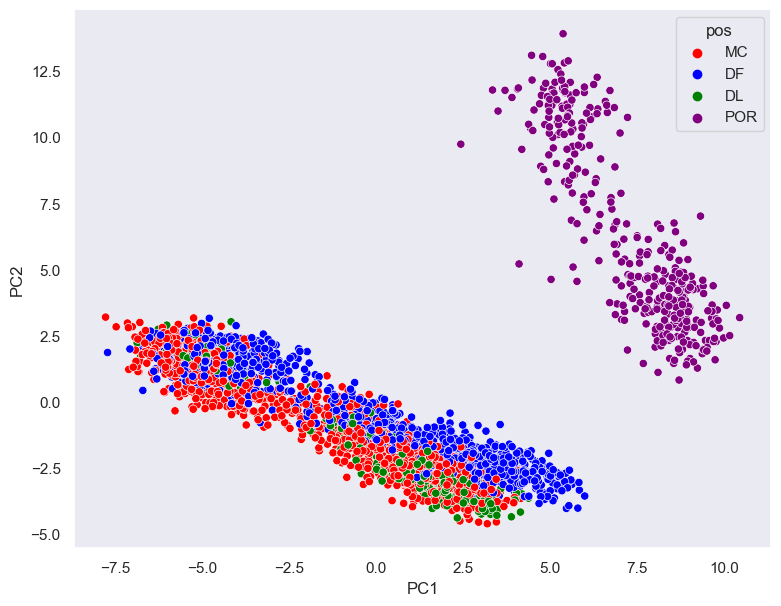

In [15]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=dataRNN, 
                x="PC1",
                y="PC2", 
                hue="pos",
                palette=["red","blue","green", "purple"])

EJEMPLO

In [25]:
dataRNN[dataRNN['names']=='Almamy Camara']

,PC1,PC2,valor,pos,names
448,2.924303,-1.850048,26.760145,DL,Almamy Camara


In [23]:
dataRNN[dataRNN['names']=='Arturo Vidal']

,PC1,PC2,valor,pos,names
1079,-7.784117,3.201292,70.190994,DF,Arturo Vidal


In [19]:
dataRNN[dataRNN['names']=='Claudio Bravo']

,PC1,PC2,valor,pos,names
1339,3.348954,11.782111,68.985672,POR,Claudio Bravo


In [20]:
dataRNN[dataRNN['names']=='Simone Zaza']

,PC1,PC2,valor,pos,names
1264,-5.461212,2.18218,68.922737,DL,Simone Zaza
